In [1]:
import pandas as pd 

# 사용자 정의 컬럼 이름 설정
column_names = [
    'RCPT_YR', 'CGG_CD', 'CGG_NM', 'STDG_CD', 'STDG_NM', 
    'LOTNO_SE', 'LOTNO_SE_NM', 'MNO', 'SNO', 'BLDG_NM', 
    'CTRT_DAY', 'THING_AMT', 'ARCH_AREA', 'LAND_AREA', 'FLR', 
    'RGHT_SE', 'RTRCN_DAY', 'ARCH_YR', 'BLDG_USG', 'DCLR_SE', 
    'OPBIZ_RESTAGNT_SGG_NM'
]

# 컬럼별 데이터 타입 설정
dtype_dict = {
    'RCPT_YR': 'int64',
    'CGG_CD': 'string',
    'CGG_NM': 'string',
    'STDG_CD': 'string',
    'STDG_NM': 'string',
    'LOTNO_SE': 'string',
    'LOTNO_SE_NM': 'string',
    'MNO': 'string',
    'SNO': 'string',
    'BLDG_NM': 'string',
    'CTRT_DAY': 'string',
    'THING_AMT': 'int64',
    'ARCH_AREA': 'float64',
    'LAND_AREA': 'float64',
    'FLR': 'string', 
    'RGHT_SE': 'string',
    'RTRCN_DAY': 'string', 
    'ARCH_YR': 'string', 
    'BLDG_USG': 'string',
    'DCLR_SE': 'string',
    'OPBIZ_RESTAGNT_SGG_NM': 'string'
}

# 사용자 정의 컬럼 이름과 데이터 타입을 사용하여 CSV 파일 불러오기
df_2018 = pd.read_csv(
    '2018.csv', 
    encoding='euc-kr',  
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1           
)

df_2019 = pd.read_csv(
    '2019.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2020 = pd.read_csv(
    '2020.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2021 = pd.read_csv(
    '2021.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2022 = pd.read_csv(
    '2022.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2023 = pd.read_csv(
    '2023.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

df_2024 = pd.read_csv(
    '2024.csv', 
    encoding='euc-kr',   
    names=column_names,  
    dtype=dtype_dict,   
    skiprows=1          
)

In [2]:
# 연도별, 건물용도별 가격 평균, 변동률
mean_df = pd.DataFrame()
df_dict = {2018: df_2018,
           2019: df_2019,
           2020: df_2020,
           2021: df_2021,
           2022: df_2022,
           2023: df_2023,
           2024: df_2024}
for year, df in df_dict.items():
    mean_df[f'{year} 평균금액'] = df.groupby('BLDG_USG')['THING_AMT'].mean()
for year in range(2019, 2025):
    mean_df[f'{year} 변동률(%)'] = ((mean_df[f'{year} 평균금액'] - mean_df[f'{year-1} 평균금액']) / mean_df[f'{year-1} 평균금액']) * 100
mean_df

,2018 평균금액,2019 평균금액,2020 평균금액,2021 평균금액,2022 평균금액,2023 평균금액,2024 평균금액,2019 변동률(%),2020 변동률(%),2021 변동률(%),2022 변동률(%),2023 변동률(%),2024 변동률(%)
BLDG_USG,,,,,,,,,,,,,
단독다가구,96121.568660,105862.942609,120827.123004,153328.529057,201517.304908,181304.837877,166188.087568,10.134431,14.135428,26.899098,31.428447,-10.030140,-8.337753
아파트,67012.218342,82119.987685,83997.721610,103106.891175,98737.506523,107180.009430,118386.256697,22.544798,2.286574,22.749628,-4.237723,8.550452,10.455539
연립다세대,26904.981040,27439.993125,29063.854651,30397.312585,33073.464666,35574.331260,35977.487207,1.988524,5.917864,4.588028,8.803910,7.561550,1.133278
오피스텔,25110.580697,25140.112130,27457.737542,27432.872446,25847.609370,26975.646399,29947.522440,0.117606,9.218835,-0.090558,-5.778699,4.364183,11.016885


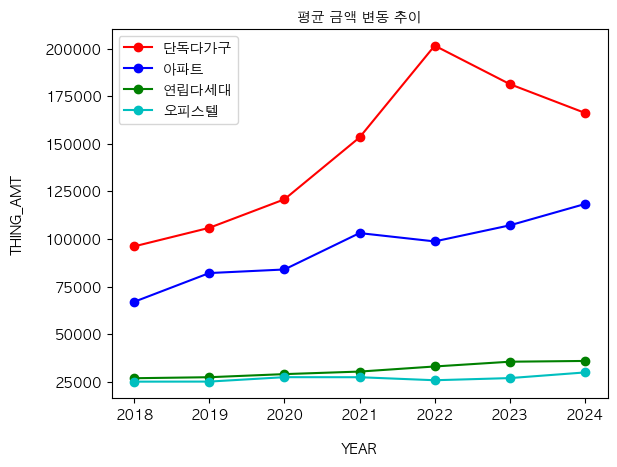

In [4]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# macOS 기본 한글 폰트 지정
rc('font', family='AppleGothic')

# 폰트 프로퍼티 객체 (범례에서 사용 가능)
fontprop = font_manager.FontProperties(fname=None, family='AppleGothic')

# 연도 리스트
연도 = [i for i in range(2018, 2025)]

plot_data = mean_df.reset_index()
단독다가구 = plot_data[plot_data['BLDG_USG'] == '단독다가구'].loc[:, '2018 평균금액':'2024 평균금액'].iloc[0]
아파트 = plot_data[plot_data['BLDG_USG'] == '아파트'].loc[:, '2018 평균금액':'2024 평균금액'].iloc[0]
연립다세대 = plot_data[plot_data['BLDG_USG'] == '연립다세대'].loc[:, '2018 평균금액':'2024 평균금액'].iloc[0]
오피스텔 = plot_data[plot_data['BLDG_USG'] == '오피스텔'].loc[:, '2018 평균금액':'2024 평균금액'].iloc[0]

plt.plot(연도, 단독다가구, 'ro-', label='단독다가구')
plt.plot(연도, 아파트, 'bo-', label='아파트')
plt.plot(연도, 연립다세대, 'go-', label='연립다세대')
plt.plot(연도, 오피스텔, 'co-', label='오피스텔')

plt.xlabel('YEAR', labelpad=15)
plt.ylabel('THING_AMT', labelpad=15)
plt.legend(prop=fontprop)  # 범례에 한글폰트 적용
plt.title('평균 금액 변동 추이', fontproperties=fontprop)  # 제목에 한글폰트 적용

plt.show()

/Users/t2024-m0247/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


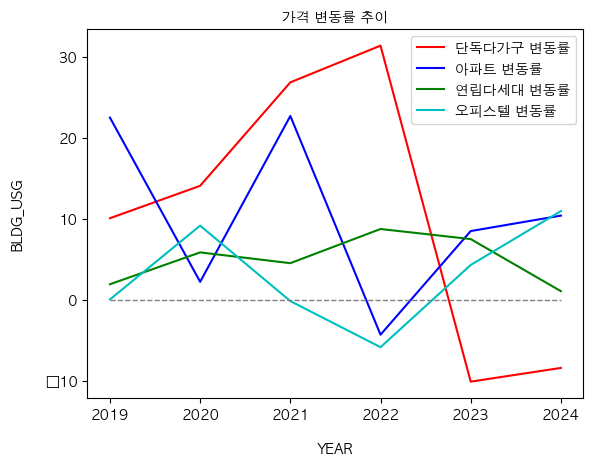

In [5]:
연도 = [i for i in range(2019, 2025)]
단독다가구_변동률 = plot_data[plot_data['BLDG_USG'] == '단독다가구'].loc[:, '2019 변동률(%)':'2024 변동률(%)'].iloc[0]
아파트_변동률 = plot_data[plot_data['BLDG_USG'] == '아파트'].loc[:, '2019 변동률(%)':'2024 변동률(%)'].iloc[0]
연립다세대_변동률 = plot_data[plot_data['BLDG_USG'] == '연립다세대'].loc[:, '2019 변동률(%)':'2024 변동률(%)'].iloc[0]
오피스텔_변동률 = plot_data[plot_data['BLDG_USG'] == '오피스텔'].loc[:, '2019 변동률(%)':'2024 변동률(%)'].iloc[0]
plt.plot(연도, 단독다가구_변동률, 'r-', label='단독다가구 변동률')
plt.plot(연도, 아파트_변동률, 'b-', label='아파트 변동률')
plt.plot(연도, 연립다세대_변동률, 'g-', label='연립다세대 변동률')
plt.plot(연도, 오피스텔_변동률, 'c-', label='오피스텔 변동률')
plt.xlabel('YEAR', labelpad=15)
plt.ylabel('BLDG_USG', labelpad=15)
plt.legend(prop=fontprop)
plt.title('가격 변동률 추이', fontproperties=fontprop)
plt.hlines(0, 2019, 2024, color='gray', linestyle='--', linewidth=1)
plt.show()

In [6]:
# 해당년도 가격에 가격변동률을 곱해서 조정가격 구하기
for i in range(2018, 2024):
    df_dict[i]['THING_AMT'] = df_dict[i].apply(
        lambda x: (
            x['THING_AMT'] * (1 + mean_df.loc['단독다가구', f'{i+1} 변동률(%)'] / 100) if x['BLDG_USG'] == '단독다가구' else
            x['THING_AMT'] * (1 + mean_df.loc['아파트', f'{i+1} 변동률(%)'] / 100) if x['BLDG_USG'] == '아파트' else
            x['THING_AMT'] * (1 + mean_df.loc['연립다세대', f'{i+1} 변동률(%)'] / 100) if x['BLDG_USG'] == '연립다세대' else
            x['THING_AMT'] * (1 + mean_df.loc['오피스텔', f'{i+1} 변동률(%)'] / 100) if x['BLDG_USG'] == '오피스텔' else
            None
        ),
        axis = 1
    )
    df_dict[i+1] = pd.concat([df_dict[i+1], df_dict[i]], axis=0, ignore_index=True)


# 최종적으로 사용할 데이터프레임
real_estate = df_dict[2024]
real_estate.head()

,RCPT_YR,CGG_CD,CGG_NM,STDG_CD,STDG_NM,LOTNO_SE,LOTNO_SE_NM,MNO,SNO,BLDG_NM,...,THING_AMT,ARCH_AREA,LAND_AREA,FLR,RGHT_SE,RTRCN_DAY,ARCH_YR,BLDG_USG,DCLR_SE,OPBIZ_RESTAGNT_SGG_NM
0,2024,11380,은평구,10200,녹번동,1,대지,0086,0125,성원빌라(86-125),...,16400.0,53.07,25.0000,4,<NA>,<NA>,1991,연립다세대,중개거래,서울 은평구
1,2024,11500,강서구,10300,화곡동,1,대지,0924,0004,팔팔빌라,...,35000.0,39.24,27.0000,2,<NA>,<NA>,1986,연립다세대,직거래,<NA>
2,2024,11560,영등포구,11100,당산동1가,1,대지,0143,0000,다솔시티하임,...,30000.0,29.54,14.0000,5,<NA>,<NA>,2017,연립다세대,직거래,<NA>
3,2024,11560,영등포구,12800,양평동4가,1,대지,0220,0000,해울빌,...,36000.0,40.41,63.6400,3,<NA>,<NA>,2021,오피스텔,중개거래,서울 용산구
4,2024,11410,서대문구,11200,대현동,1,대지,0090,0077,유씨유 이대,...,19300.0,17.31,30.8725,5,<NA>,<NA>,2018,오피스텔,중개거래,서울 서대문구


In [7]:
# 공공데이터 매물 주소 구하기
real_estate['MNO'] = real_estate['MNO'].str.lstrip('0')
real_estate['SNO'] = real_estate['SNO'].str.lstrip('0')

def address(x):
    if pd.notna(x['MNO']) and x['MNO'] != '':
        if pd.notna(x['SNO']) and x['SNO'] != '':
            return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM'] + ' ' + x['MNO'] + '-' + x['SNO']
        else:
            return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM'] + ' ' + x['MNO']
    else:
        return '서울특별시' + ' ' + x['CGG_NM'] + ' ' + x['STDG_NM']

real_estate['address'] = real_estate.apply(address, axis=1)

In [8]:
# 취소일이 지정된 매물 제외하기
real_estate = real_estate[real_estate['RTRCN_DAY'].isnull()]

In [9]:
## 방개수와 신축여부 구하기
real_estate = real_estate[['CGG_NM','STDG_NM','MNO','SNO','BLDG_NM','ARCH_AREA','ARCH_YR','THING_AMT','FLR','BLDG_USG','address']]
def count_room(x):
  if x<=30:
    return '1개'
  elif x<=70:
    return '2개'
  elif x<=100:
    return '3개'
  else :
    return '4개'

real_estate['방개수']=real_estate.apply(lambda x:count_room(x['ARCH_AREA']), axis=1)


def standard(x):
  list_i=[]
  for i in range(2019, 2025):
    i = str(i)
    list_i.append(i)
  if str(x) in (list_i):
    return '신축'
  else :
    return '구축'

real_estate['신축여부']=real_estate.apply(lambda x:standard(x['ARCH_YR']), axis=1)

real_estate.head()

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
0,은평구,녹번동,86,125,성원빌라(86-125),53.07,1991,16400.0,4,연립다세대,서울특별시 은평구 녹번동 86-125,2개,구축
1,강서구,화곡동,924,4,팔팔빌라,39.24,1986,35000.0,2,연립다세대,서울특별시 강서구 화곡동 924-4,2개,구축
2,영등포구,당산동1가,143,,다솔시티하임,29.54,2017,30000.0,5,연립다세대,서울특별시 영등포구 당산동1가 143,1개,구축
3,영등포구,양평동4가,220,,해울빌,40.41,2021,36000.0,3,오피스텔,서울특별시 영등포구 양평동4가 220,2개,신축
4,서대문구,대현동,90,77,유씨유 이대,17.31,2018,19300.0,5,오피스텔,서울특별시 서대문구 대현동 90-77,1개,구축


In [32]:
# 1. 고객이 원하는 기준으로 가격, 방 개수, 건물종류, 신축여부로 필터링하기

from IPython.display import display
def filter_by_price(df):
    try:
        y = int(input('금액을 입력해주세요: '))
        filtered = df[df['THING_AMT'] < y]
        return filtered
    except ValueError:
        print("금액은 숫자로 입력해주세요.")
        return df  # 필터링 없이 원본 반환
def filter_by_rooms(df):
    rooms = input('\n방 개수를 입력해주세요: ').strip()
    filtered = df[df['방개수'] == rooms]  # 숫자형이면 int(rooms)
    return filtered
def filter_by_usg(df):
  usg = input('\n건물종류를 입력해주세요: ').strip()
  filtered = df[df['BLDG_USG'] == usg]
  return filtered
def filter_by_new_old(df):
  new_old= input('\n신축,구축 여부를 입력해주세요: ').strip()
  filtered = df[df['신축여부'] == new_old]
  return filtered
df_price = filter_by_price(real_estate)

print("\n[금액 조건으로 필터링된 결과]")
display(df_price)
df_rooms = filter_by_rooms(df_price)
print("\n[방 개수 조건으로 필터링된 결과]")
display(df_rooms)
df_usg = filter_by_usg(df_rooms)
print("\n[BLDG_USG 조건으로 필터링된 결과]")
display(df_usg)
df_final = filter_by_new_old(df_usg)
print("\n[신축,구축여부 조건으로 필터링된 결과]")
display(df_final)


[금액 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
0,은평구,녹번동,86,125,성원빌라(86-125),53.07,1991,16400.000000,4,연립다세대,서울특별시 은평구 녹번동 86-125,2개,구축
1,강서구,화곡동,924,4,팔팔빌라,39.24,1986,35000.000000,2,연립다세대,서울특별시 강서구 화곡동 924-4,2개,구축
2,영등포구,당산동1가,143,,다솔시티하임,29.54,2017,30000.000000,5,연립다세대,서울특별시 영등포구 당산동1가 143,1개,구축
3,영등포구,양평동4가,220,,해울빌,40.41,2021,36000.000000,3,오피스텔,서울특별시 영등포구 양평동4가 220,2개,신축
4,서대문구,대현동,90,77,유씨유 이대,17.31,2018,19300.000000,5,오피스텔,서울특별시 서대문구 대현동 90-77,1개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833595,성북구,동소문동5가,15,,성신여대역 솔하임,15.94,0,38689.347791,15,아파트,서울특별시 성북구 동소문동5가 15,1개,구축
833596,성북구,동소문동5가,15,,성신여대역 솔하임,15.94,0,38689.347791,16,아파트,서울특별시 성북구 동소문동5가 15,1개,구축
833597,성북구,동소문동5가,15,,성신여대역 솔하임,15.94,0,38689.347791,16,아파트,서울특별시 성북구 동소문동5가 15,1개,구축
833601,동대문구,이문동,<NA>,<NA>,<NA>,60.96,1971,43223.412259,<NA>,단독다가구,서울특별시 동대문구 이문동,2개,구축



[방 개수 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
21,구로구,구로동,317,31,호정빌라(317-31),70.160,1997,31500.000000,3,연립다세대,서울특별시 구로구 구로동 317-31,3개,구축
29,서대문구,북가좌동,455,,신일해피트리,84.980,2005,77000.000000,1,아파트,서울특별시 서대문구 북가좌동 455,3개,구축
78,구로구,천왕동,273,,천왕이펜하우스4단지,84.970,2011,74500.000000,12,아파트,서울특별시 구로구 천왕동 273,3개,구축
110,강서구,등촌동,526,25,뜨레비앙2차,78.675,2007,37500.000000,3,연립다세대,서울특별시 강서구 등촌동 526-25,3개,구축
130,관악구,봉천동,656,9,그린아이티빌,78.290,2002,32000.000000,1,연립다세대,서울특별시 관악구 봉천동 656-9,3개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833431,도봉구,쌍문동,725,,쌍문동삼성래미안,84.940,2002,64570.578162,1,아파트,서울특별시 도봉구 쌍문동 725,3개,구축
833438,노원구,월계동,929,,현대,84.980,2000,77732.022959,25,아파트,서울특별시 노원구 월계동 929,3개,구축
833545,금천구,독산동,1139,,청광플러스원,84.960,2003,62715.609433,3,아파트,서울특별시 금천구 독산동 1139,3개,구축
833553,성동구,행당동,1,4,우성포커스,76.450,2003,72432.112302,1,아파트,서울특별시 성동구 행당동 1-4,3개,구축



[BLDG_USG 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
21,구로구,구로동,317,31,호정빌라(317-31),70.160,1997,31500.000000,3,연립다세대,서울특별시 구로구 구로동 317-31,3개,구축
110,강서구,등촌동,526,25,뜨레비앙2차,78.675,2007,37500.000000,3,연립다세대,서울특별시 강서구 등촌동 526-25,3개,구축
130,관악구,봉천동,656,9,그린아이티빌,78.290,2002,32000.000000,1,연립다세대,서울특별시 관악구 봉천동 656-9,3개,구축
134,강동구,성내동,454,12,남광하이빌,72.100,2004,32500.000000,4,연립다세대,서울특별시 강동구 성내동 454-12,3개,구축
140,관악구,봉천동,889,4,베스트빌101동,73.020,2003,53000.000000,2,연립다세대,서울특별시 관악구 봉천동 889-4,3개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833213,서대문구,북아현동,129,75,(129-75),78.480,1999,73947.461239,7,연립다세대,서울특별시 서대문구 북아현동 129-75,3개,구축
833275,마포구,당인동,28,11,세종빌리지,71.320,2008,52819.615171,3,연립다세대,서울특별시 마포구 당인동 28-11,3개,구축
833378,중랑구,면목동,727,302,강호연립,84.590,1978,66860.272368,1,연립다세대,서울특별시 중랑구 면목동 727-302,3개,구축
833388,관악구,신림동,1439,2,(1439-2),70.240,2002,40784.766145,4,연립다세대,서울특별시 관악구 신림동 1439-2,3개,구축



[신축,구축여부 조건으로 필터링된 결과]


,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부
21,구로구,구로동,317,31,호정빌라(317-31),70.160,1997,31500.000000,3,연립다세대,서울특별시 구로구 구로동 317-31,3개,구축
110,강서구,등촌동,526,25,뜨레비앙2차,78.675,2007,37500.000000,3,연립다세대,서울특별시 강서구 등촌동 526-25,3개,구축
130,관악구,봉천동,656,9,그린아이티빌,78.290,2002,32000.000000,1,연립다세대,서울특별시 관악구 봉천동 656-9,3개,구축
134,강동구,성내동,454,12,남광하이빌,72.100,2004,32500.000000,4,연립다세대,서울특별시 강동구 성내동 454-12,3개,구축
140,관악구,봉천동,889,4,베스트빌101동,73.020,2003,53000.000000,2,연립다세대,서울특별시 관악구 봉천동 889-4,3개,구축
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833213,서대문구,북아현동,129,75,(129-75),78.480,1999,73947.461239,7,연립다세대,서울특별시 서대문구 북아현동 129-75,3개,구축
833275,마포구,당인동,28,11,세종빌리지,71.320,2008,52819.615171,3,연립다세대,서울특별시 마포구 당인동 28-11,3개,구축
833378,중랑구,면목동,727,302,강호연립,84.590,1978,66860.272368,1,연립다세대,서울특별시 중랑구 면목동 727-302,3개,구축
833388,관악구,신림동,1439,2,(1439-2),70.240,2002,40784.766145,4,연립다세대,서울특별시 관악구 신림동 1439-2,3개,구축


In [ ]:
# 2. 추천 법정동 찾기(Top N개 법정동 추출)
## 1번에서 추출된 법정동에 지표별 리스트를 merge → 모든 지표값이 null이면 해당 법정동 삭제
# 사용한 라이브러리
import pandas as pd
from functools import reduce
import numpy as np
# 법정동 테이블
df0 = pd.read_csv('법정동.csv')
df0 = df0[df0['시도명'] == '서울특별시'].drop(['법정동코드', '리명', '순위', '생성일자', '과거법정동코드'], axis = 1)
df0 = df0[df0['삭제일자'].isnull()].reset_index().drop(['삭제일자', 'index', '시도명'], axis=1)
df0 = df0[df0['읍면동명'].notnull()]
법정동 = df0.rename(columns={'시군구명':'CGG_NM', '읍면동명':'STDG_NM'}).reset_index(drop=True)
# 서울시 동별 입시 보습 학원 개수
df1 = pd.read_csv('서울시 학원 교습소 정보.csv', encoding='cp949')
df1 = df1[df1['분야명'] == '입시.검정 및 보습']
df1['CGG_NM'] = df1['도로명주소'].str.extract(r'([가-힣]+구)')
df1['STDG_NM'] = df1['도로명상세주소'].str.extract(r'\(([^,()]+동)')
학원개수 = df1[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
학원개수.columns = ['CGG_NM', 'STDG_NM', 'academy']
# 서울시 동별 유흥주점 개수
df2 = pd.read_csv('서울시 유흥주점영업 인허가 정보.csv', encoding='euc-kr')
df2['CGG_NM'] = df2['지번주소'].str.extract(r'([가-힣]+구)')
df2['STDG_NM'] = df2['지번주소'].str.extract(r'(\S+동)')
유흥주점 = df2[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
유흥주점.columns = ['CGG_NM', 'STDG_NM', 'bar']
# 서울시 동별 병의원 개수
df3 = pd.read_csv('서울시 병의원 위치 정보.csv', encoding='cp949')
df3['CGG_NM'] = df3['주소'].str.extract(r'([가-힣]+구)')
df3['STDG_NM'] = df3['주소'].str.extract(r'\(([^,()]+동)')
병의원수 = df3[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병의원수.columns = ['CGG_NM', 'STDG_NM', 'hospital']
# 서울시 동별 2차병원
df4 = pd.read_csv('2차병원.csv', encoding='cp949')
df4 = df4[df4['소재지주소'].str.contains('서울특별시')]
df4['CGG_NM'] = df4['소재지주소'].str.extract(r'([가-힣]+구)')
df4['STDG_NM'] = df4['소재지주소'].str.extract(r'\(([^)]+)\)')
병원_2차 = df4[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병원_2차.columns = ['CGG_NM', 'STDG_NM', 'second_hospital']
# 서울시 동별 3차병원
df5 = pd.read_csv('3차병원.csv',encoding='cp949')
df5 = df5[df5['소재지주소'].str.contains('서울특별시')]
df5['CGG_NM'] = df5['소재지주소'].str.extract(r'([가-힣]+구)')
df5['STDG_NM'] = df5['소재지주소'].str.extract(r'\(([^)]+)\)')
병원_3차 = df5[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
병원_3차.columns = ['CGG_NM', 'STDG_NM', 'third_hospital']
# 대규모점포 테이블 불러오기
df6 = pd.read_csv('서울시 대규모점포 인허가 정보.csv', encoding='euc-kr')
df6 = df6[df6['상세영업상태명'] == '정상영업']
df6['CGG_NM'] = df6['도로명주소'].str.extract(r'([가-힣]+구)')
df6['STDG_NM'] = df6['도로명주소'].str.extract(r'\(([^,()]+동)')
대규모점포 = df6[['CGG_NM', 'STDG_NM']].value_counts().reset_index()
대규모점포.columns = ['CGG_NM', 'STDG_NM', 'store']
# 외부 자료끼리 병합
merge_data = reduce(lambda x,y: pd.merge(x,y, on=['CGG_NM', 'STDG_NM'], how='left'), [법정동, 학원개수, 유흥주점, 대규모점포, 병의원수, 병원_2차, 병원_3차])
merge_data = merge_data.dropna(how='all', subset=['academy', 'bar', 'store', 'hospital', 'second_hospital', 'third_hospital']).reset_index(drop=True)

In [20]:
## 2차병원, 3차병원을 위한 가중치

#병원개수 수기 작성
hospital_counts = {
    "상급종합병원": 47,
    "종합병원": 333,
    "병원": 1439,
    "요양병원": 1329,
    "정신병원": 261,
    "의원": 37286,
    "치과병원": 9739,
    "치과의원": 9740,
    "한방병원": 7703,
    "한의원": 7703,
    "보건기관 등": 3462,
    '전체': None
}
# 병원 개수에 따라 가중치 계산
df7 = pd.read_excel('건강보험진료통계-종별진료인원_2023.xlsx')
df7 = df7.rename(columns={'Unnamed: 1':'입원외래구분','Unnamed: 2':'2019년','Unnamed: 3':'2020년','Unnamed: 4':'2021년','Unnamed: 5':'2022년','Unnamed: 6':'2023년'})
df7 =df7[df7['입원외래구분']=='외래']
df7 = df7.dropna(axis=1).copy()
df7.loc[:, '병원 개수'] = df7['종별진료인원(단위_천명)_2023'].map(hospital_counts)
df7['2023년'] = pd.to_numeric(df7['2023년'], errors='coerce')
df7.loc[:, '평균 진료수'] = df7['2023년'] / df7['병원 개수']
df7.drop(columns=['입원외래구분', '2019년', '2020년', '2021년', '2022년', '2023년', '병원 개수'], inplace=True)
df7

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종별진료인원(단위_천명)_2023,평균 진료수
4,전체,NaN
7,상급종합병원,179.255319
10,종합병원,41.198198
13,병원,9.184156
16,요양병원,0.272385
19,정신병원,0.977011
22,의원,1.229335
25,치과병원,0.170449
28,치과의원,2.403491
31,한방병원,0.094119


In [ ]:
# 2. 추천 법정동 찾기(Top N개 법정동 추출)
## 엔트로피 가중치를 이용한 상위 N개 법정동 추출
# 병원 가중치
merge_data['w_second'] = merge_data['second_hospital'] * 5
merge_data['w_third'] = merge_data['third_hospital'] * 20
merge_data = merge_data.fillna(0)
merge_data['t_hospital'] = merge_data['hospital'] + merge_data['w_second'] + merge_data['w_third']
# 엔트로피 지수 구할 지표 추출
data = merge_data[['academy', 'bar', 'store', 't_hospital']]
# 엔트로피 가중치
# 1. 정규화(MIN_MAX)
norm = (data - data.min()) / (data.max() - data.min())
# 2. 엔트로피값
k = 1/np.log(len(data))
entropy = []
for col in norm.columns:
    p = norm[col]/norm[col].sum()
    p = p[p > 0]
    answer = np.sum(p * np.log(p))
    entropy.append(-k * answer)
# 3. 다양성
d = [1-i for i in entropy]
# 4.가중치
w = [i/sum(d) for i in d]
# 가중치 곱한 최종 점수 상위 5개 법정동
top10 = merge_data[['CGG_NM', 'STDG_NM']].copy()
top10['score'] = w[0] * norm['academy'] - w[1] * norm['bar'] + w[2] * norm['store'] + w[3] * norm['t_hospital']
top10 = top10.sort_values('score', ascending=False).head(10)
top10

,CGG_NM,STDG_NM,score
273,강남구,대치동,0.378522
213,양천구,목동,0.308932
212,양천구,신정동,0.238327
81,중구,신당동,0.227167
274,강남구,신사동,0.226731
226,구로구,구로동,0.194614
160,노원구,상계동,0.181432
161,노원구,중계동,0.177573
149,강북구,미아동,0.164938
118,광진구,구의동,0.161837


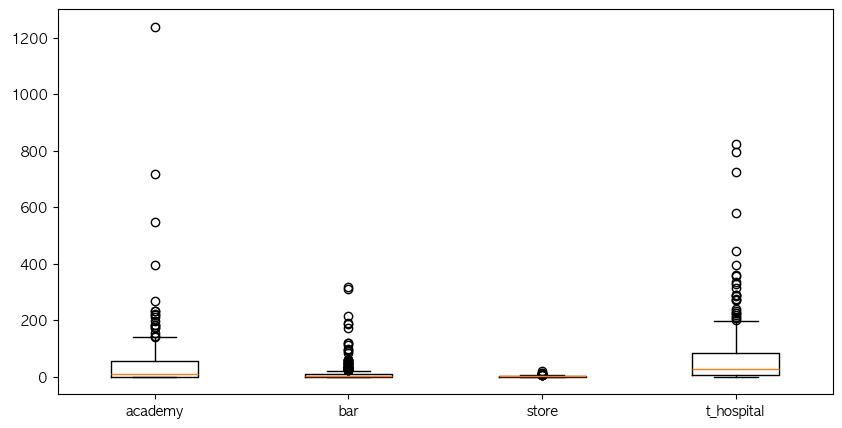

In [35]:
idx = [i for i in range(1, 5)]
plt.figure(figsize = (10, 5))
plt.boxplot([data['academy'], data['bar'], data['store'], data['t_hospital']])
labels = ['academy', 'bar', 'store', 't_hospital']
plt.xticks(idx, labels)
plt.show()

In [36]:
filtered_real_estate = pd.merge(df_final, top10, how='inner', on=['CGG_NM', 'STDG_NM'])
filtered_real_estate

,CGG_NM,STDG_NM,MNO,SNO,BLDG_NM,ARCH_AREA,ARCH_YR,THING_AMT,FLR,BLDG_USG,address,방개수,신축여부,score
0,구로구,구로동,317,31,호정빌라(317-31),70.16,1997,31500.000000,3,연립다세대,서울특별시 구로구 구로동 317-31,3개,구축,0.194614
1,양천구,목동,318,114,목동하이빌(318-114),71.37,2002,25800.000000,3,연립다세대,서울특별시 양천구 목동 318-114,3개,구축,0.308932
2,강북구,미아동,198,5,로얄하이츠,77.85,1991,16000.000000,-1,연립다세대,서울특별시 강북구 미아동 198-5,3개,구축,0.164938
3,구로구,구로동,1132,30,삼성가동(1132-30),87.01,2003,35800.000000,4,연립다세대,서울특별시 구로구 구로동 1132-30,3개,구축,0.194614
4,중구,신당동,304,803,현대로얄빌라,77.95,1990,62500.000000,3,연립다세대,서울특별시 중구 신당동 304-803,3개,구축,0.227167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,양천구,신정동,924,25,새롬주택,72.72,2004,30755.725289,2,연립다세대,서울특별시 양천구 신정동 924-25,3개,구축,0.238327
1606,광진구,구의동,225,20,(225-20),75.02,2004,40116.163421,1,연립다세대,서울특별시 광진구 구의동 225-20,3개,구축,0.161837
1607,중구,신당동,333,184,서울빌라,87.74,1984,66860.272368,2,연립다세대,서울특별시 중구 신당동 333-184,3개,구축,0.227167
1608,강남구,대치동,917,21,남서울빌라,82.14,2004,78761.400850,4,연립다세대,서울특별시 강남구 대치동 917-21,3개,구축,0.378522


In [ ]:
# 3. 위치 데이터 이용_경로 계산
## 지하철역 위치 데이터 불러오기
df_sub_addr = pd.read_excel('전체_도시철도역사정보_20250417.xlsx')
df_sub_addr = df_sub_addr[df_sub_addr['운영기관명'].str.contains('서울')]
df_sub_addr.loc[:, 'CGG_NM'] = df_sub_addr['역사도로명주소'].str.extract(r'([가-힣]+구)')
df_sub_addr.loc[:, 'STDG_NM'] = df_sub_addr['역사도로명주소'].str.extract(r'\(([^,()]+동)')
subway = df_sub_addr[['CGG_NM', 'STDG_NM', '역사명', '역위도', '역경도']]
subway = subway.drop_duplicates(subset='역사명')

filtered_subway = subway[
    (subway['CGG_NM'].isin(filtered_real_estate['CGG_NM'])) &
    (subway['STDG_NM'].isin(filtered_real_estate['STDG_NM']))
]

print(filtered_subway)

    CGG_NM STDG_NM          역사명        역위도         역경도
30     강남구     대치동           대치  37.494601  127.063449
38     강남구     신사동           신사  37.516438  127.020247
40     강남구     신사동          압구정  37.526169  127.028502
41      중구     신당동           약수  37.554674  127.010628
52     강남구     대치동          학여울  37.496757  127.070541
56     노원구     상계동           노원  37.656274  127.063183
61     강북구     미아동  미아(서울사이버대학)  37.626435  127.026151
62     강북구     미아동        미아사거리  37.613276  127.030083
63     노원구     상계동          불암산  37.669560  127.078404
66     노원구     상계동           상계  37.660576  127.073199
532    광진구     구의동   강변(동서울터미널)  37.535161  127.094684
535    구로구     구로동      구로디지털단지  37.485005  126.902626
536    광진구     구의동     구의(광진구청)  37.536857  127.085024
539    구로구     구로동     대림(구로구청)  37.492426  126.895293
553     중구     신당동           신당  37.561470  127.056348
596    양천구      목동           목동  37.526088  126.864296
606    양천구     신정동      신정(은행정)  37.525001  126.856176
615    양천구

In [41]:
## 학교 위치 데이터 불러오기
df_school_addr = pd.read_csv('전국초중등학교위치표준데이터.csv', encoding='cp949')
df_school_addr = df_school_addr[df_school_addr['시도교육청명'] == '서울특별시교육청']
df_school_addr.loc[:, 'CGG_NM'] = df_school_addr['소재지지번주소'].str.extract(r'([가-힣]+구)')
df_school_addr.loc[:, 'STDG_NM'] = df_school_addr['소재지지번주소'].str.extract(r'([가-힣]+동)')
school = df_school_addr[['CGG_NM', 'STDG_NM', '학교명', '위도', '경도']]

filtered_school = school[
    (school['CGG_NM'].isin(filtered_real_estate['CGG_NM'])) &
    (school['STDG_NM'].isin(filtered_real_estate['STDG_NM']))
]
print(filtered_school)

      CGG_NM STDG_NM       학교명         위도          경도
438      노원구     중계동  대진여자고등학교  37.646174  127.067197
525      구로구     구로동     영림중학교  37.497220  126.890689
577      노원구     상계동  서울당현초등학교  37.648260  127.058214
624      노원구     중계동  서울청계초등학교  37.645034  127.066139
663      양천구      목동  서울경인초등학교  37.532871  126.885696
...      ...     ...       ...        ...         ...
11780     중구     신당동  서울장충초등학교  37.559911  127.011705
11789    양천구      목동     월촌중학교  37.537065  126.882759
11888    노원구     중계동    상명고등학교  37.649548  127.068042
11912    노원구     중계동  서울중원초등학교  37.643982  127.062783
11914     중구     신당동     장원중학교  37.553965  127.006043

[167 rows x 5 columns]


In [ ]:
import pandas as pd
import requests
import time
# ① 카카오 REST API 키 입력
KAKAO_REST_API_KEY = "58a94e08cd433f0a789ddee57624f990"
# ② 주소 → 위도/경도 함수
def get_coords_from_address(address, api_key):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {api_key}"}
    params = {"query": address}
    try:
        res = requests.get(url, headers=headers, params=params)
        if res.status_code == 200:
            data = res.json()
            if data['documents']:
                first = data['documents'][0]
                lat = float(first['y'])  # 위도
                lng = float(first['x'])  # 경도
                return lat, lng
    except:
        pass
    return None, None  # 실패 시
# ③ CSV 파일 불러오기
 # 주소 컬럼 이름이 'address'이어야 함
# ④ 위도/경도 리스트 생성
lat_list = []
lng_list = []
# ⑤ 각 행의 address로 좌표 요청
for addr in filtered_real_estate['address']:
    lat, lng = get_coords_from_address(addr, KAKAO_REST_API_KEY)
    lat_list.append(lat)
    lng_list.append(lng)
# ⑥ 좌표 컬럼 추가
filtered_real_estate['위도'] = lat_list
filtered_real_estate['경도'] = lng_list


filtered_real_estate['BLDG_NM'].value_counts()

In [ ]:
# SHP 파일로 변환
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt


geometry = [Point(xy) for xy in zip(filtered_real_estate['경도'], filtered_real_estate['위도'])]
gdf_points = gpd.GeoDataFrame(filtered_real_estate, geometry=geometry, crs="EPSG:4326")
gdf_points = gdf_points.to_crs(epsg=5179)
gdf_points.to_file("real_estate_points_5179.shp", encoding="euc-kr")
gdf_estate = gpd.read_file("real_estate_points_5179.shp")

geometry1 = [Point(xy) for xy in zip(subway["역경도"], subway["역위도"])]
gdf_points1 = gpd.GeoDataFrame(subway, geometry=geometry1, crs="EPSG:4326")
gdf_points1 = gdf_points1.to_crs(epsg=5179)
gdf_points1.to_file("seoul_sub_points_5179.shp", encoding="euc-kr")
gdf_subway = gpd.read_file("seoul_sub_points_5179.shp")

geometry2 = [Point(xy) for xy in zip(school["경도"], school["위도"])]
gdf_points2 = gpd.GeoDataFrame(school, geometry=geometry2, crs="EPSG:4326")
gdf_points2 = gdf_points2.to_crs(epsg=5179)
gdf_points2.to_file("seoul_school_points_5179.shp", encoding="euc-kr")
gdf_school = gpd.read_file("seoul_school_points_5179.shp")


gdf_boundary = gpd.read_file("seoul_emd.shp", encoding='euc-kr')
gdf_boundary = gdf_boundary.to_crs(epsg=5179)

fig, ax = plt.subplots(figsize=(20, 20))
gdf_boundary.plot(ax=ax, edgecolor='gray', facecolor='none', linewidth=0.5)
gdf_subway.plot(ax=ax, color='red', markersize=20, label='Subway')
gdf_school.plot(ax=ax, color='green', markersize=20, label='School')
gdf_estate.plot(ax=ax, color='blue', markersize=40, label='Real Estate')
ax.set_title("Seoul Subway", fontsize=30)
legend = ax.legend(loc='upper right', fontsize=12, title="Legend")

plt.show()  

In [ ]:
import requests
import folium
import pandas as pd
import geopandas as gpd

# Mapbox API 키
MAPBOX_TOKEN = 'pk.eyJ1IjoidmxmdG1kNjAwOCIsImEiOiJjbWMxaTRkOGswNmQ5Mmtvano2MmdqdHdrIn0.ckEJMKAK1p8t7Ss3XfFsFg'

# 지하철 데이터 로드 및 좌표 변환
gdf_subway = gpd.read_file("seoul_sub_points_5179.shp").to_crs(epsg=4326)
subway_info = list(zip(gdf_subway.geometry.x, gdf_subway.geometry.y, gdf_subway['역사명']))

# 학교 데이터 로드 및 좌표 변환
gdf_school = gpd.read_file("seoul_school_points_5179.shp").to_crs(epsg=4326)
school_info = list(zip(gdf_school.geometry.x, gdf_school.geometry.y, gdf_school['학교명']))

# 결과 리스트 초기화
valid_subway_pairs = []
valid_school_pairs = []

# 지도 초기화 (서울 중심)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=12)

for idx, row in filtered_real_estate.iterrows():
    dest_lat = row['위도']
    dest_lon = row['경도']
    address = row['address']
    if dest_lat == 0.0 or dest_lon == 0.0:
        continue

    # --- 지하철 처리 ---
    closest_subway = min(subway_info, key=lambda x: (dest_lat - x[1])**2 + (dest_lon - x[0])**2)
    subway_lon, subway_lat, subway_name = closest_subway
    origin_subway = f"{subway_lon},{subway_lat}"
    destination = f"{dest_lon},{dest_lat}"
    url = f"https://api.mapbox.com/directions/v5/mapbox/walking/{origin_subway};{destination}"
    params = {
        "access_token": MAPBOX_TOKEN,
        "geometries": "geojson",
        "overview": "full"
    }
    try:
        response = requests.get(url, params=params)
        data = response.json()
        if 'routes' in data and data['routes']:
            distance = data['routes'][0]['distance']  # meters
            if distance <= 800:
                valid_subway_pairs.append({
                    '매물주소': address,
                    '지하철역': subway_name,
                    '도보거리(m)': round(distance)
                })
                # 지도에 경로, 마커 추가
                coords = data['routes'][0]['geometry']['coordinates']
                folium.PolyLine(
                    locations=[[lat, lon] for lon, lat in coords],
                    color="blue", weight=3, opacity=0.7
                ).add_to(m)
                folium.Marker(
                    [dest_lat, dest_lon],
                    popup=f"매물\n{address}",
                    icon=folium.Icon(color="red", icon="home")
                ).add_to(m)
                folium.Marker(
                    [subway_lat, subway_lon],
                    popup=f"지하철: {subway_name}",
                    icon=folium.Icon(color="green", icon="train")
                ).add_to(m)
    except Exception as e:
        print(f"지하철 경로 오류: {origin_subway} → {destination} / {e}")

    # --- 학교 처리 ---
    closest_school = min(school_info, key=lambda x: (dest_lat - x[1])**2 + (dest_lon - x[0])**2)
    school_lon, school_lat, school_name = closest_school
    origin_school = f"{school_lon},{school_lat}"
    try:
        response = requests.get(f"https://api.mapbox.com/directions/v5/mapbox/walking/{origin_school};{destination}", params=params)
        data = response.json()
        if 'routes' in data and data['routes']:
            distance = data['routes'][0]['distance']
            if distance <= 800:
                valid_school_pairs.append({
                    '매물주소': address,
                    '학교': school_name,
                    '도보거리(m)': round(distance)
                })
                # 지도에 경로, 마커 추가
                coords = data['routes'][0]['geometry']['coordinates']
                folium.PolyLine(
                    locations=[[lat, lon] for lon, lat in coords],
                    color="purple", weight=3, opacity=0.7
                ).add_to(m)
                folium.Marker(
                    [dest_lat, dest_lon],
                    popup=f"매물\n{address}",
                    icon=folium.Icon(color="red", icon="home")
                ).add_to(m)
                folium.Marker(
                    [school_lat, school_lon],
                    popup=f"학교: {school_name}",
                    icon=folium.Icon(color="darkgreen", icon="school")
                ).add_to(m)
    except Exception as e:
        print(f"학교 경로 오류: {origin_school} → {destination} / {e}")

# 데이터프레임으로 변환 후 출력
df_subway = pd.DataFrame(valid_subway_pairs)
df_school = pd.DataFrame(valid_school_pairs)

display(df_subway)
display(df_school)

legend_html = """
<div style="
    position: fixed; 
    top: 50px; right: 50px; width: 120px; height: 90px; 
    background-color: white; 
    border:1.5px solid grey; 
    z-index:9999; 
    font-size:11px;
    padding: 6px;
    box-shadow: 1.5px 1.5px 4px rgba(0,0,0,0.25);
    line-height: 1.2;
    ">
<b style="font-size:12px;">🗺️ 범례</b><br>
<span style="color:blue;">■</span> 지하철 경로<br>
<span style="color:purple;">■</span> 학교 경로<br>
<span style="color:red;">🏠</span> 매물<br>
<span style="color:green;">🚉</span> 지하철역<br>
<span style="color:darkgreen;">🏫</span> 학교<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))





# 지도 저장
m.save("mapbox_routes_all.html")
m

In [ ]:
final_real_estate = pd.merge(df_subway, df_school, how='inner', on=['매물주소'])
final_real_estate

In [ ]:
final_real_estate_df = filtered_real_estate[(filtered_real_estate['address'].isin(final_real_estate['매물주소']))]
final_real_estate_df

In [ ]:
final_real_estate_df = final_real_estate_df.sort_values(by=['THING_AMT','BLDG_NM'], ascending=[False,True]).reset_index(drop=True)
final_real_estate_df

In [ ]:
print(type(final_real_estate_df))
final_real_estate_df = pd.DataFrame(final_real_estate_df)

final_real_estate_df = final_real_estate_df[['CGG_NM','STDG_NM','BLDG_NM','THING_AMT','FLR','address','score']]
final_real_estate_df
final_real_estate_df.reset_index(drop=True, inplace=True)
final_real_estate_df.index = range(1, len(final_real_estate_df) + 1)

head2 = final_real_estate_df.head(3)
tail2 = final_real_estate_df.tail(3)


ellipsis2 = pd.DataFrame([['...'] * final_real_estate_df.shape[1]], columns=final_real_estate_df.columns)
ellipsis2.index = ['...']

preview2 = pd.concat([head2, ellipsis2, tail2])
preview2